<a href="https://colab.research.google.com/github/IIAnirudhII/BU/blob/master/Deep%20Learning/Lab2/Lab2(part2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


# Part a) Data Wrangling

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [4]:
type(X)

numpy.ndarray

In [5]:
print(np.isnan(X))
print(np.isnan(y))

[[False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False False]
 [False False

In [6]:
sales_type=[]
for i in y:
  if(i>=15):
    sales_type.append("high")
  elif(i<15 and i>=5):
    sales_type.append("Medium")
  else:
    sales_type.append("Low")
df["sales_type"]=sales_type
df

,Unnamed: 0,TV,Radio,Newspaper,Sales,sales_type
0,1,230.1,37.8,69.2,22.1,high
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,high
4,5,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6,Medium
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium
198,199,283.6,42.0,66.2,25.5,high


In [7]:
df.groupby('sales_type').agg({'TV': ['mean', 'min', 'max'],'Radio': ['mean', 'min', 'max'],'Newspaper': ['mean', 'min', 'max']})

TV                   Radio  ...        Newspaper            
                  mean   min    max       mean  ...   max       mean  min    max
sales_type                                      ...                             
Low           4.466667   0.7    8.6  17.766667  ...  39.6   5.133333  1.0    8.7
Medium      107.710833   5.4  290.7  16.711667  ...  49.4  28.123333  0.9  114.0
high        213.893506  93.9  296.4  33.689610  ...  49.6  35.332468  0.3  100.9

[3 rows x 9 columns]

In [8]:
df_stacked = df.stack()
df_stacked

0    Unnamed: 0         1
     TV             230.1
     Radio           37.8
     Newspaper       69.2
     Sales           22.1
                    ...  
199  TV             232.1
     Radio            8.6
     Newspaper        8.7
     Sales           13.4
     sales_type    Medium
Length: 1200, dtype: object

In [9]:
df.head().pivot(index ='TV', columns ='Sales', values =['sales_type']) 

sales_type                            
Sales       9.3     10.4    12.9  18.5  22.1
TV                                          
17.2      Medium     NaN     NaN   NaN   NaN
44.5         NaN  Medium     NaN   NaN   NaN
151.5        NaN     NaN     NaN  high   NaN
180.8        NaN     NaN  Medium   NaN   NaN
230.1        NaN     NaN     NaN   NaN  high

# Part b) Data Modeling

In [10]:
for i in range(0,len(df)):
  if(i*5<len(df)):
    df.at[i*5, 'TV'] = np.nan
  if(i*9<len(df)):
    df.at[i*9, 'Newspaper'] = np.nan


In [11]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales,sales_type
0,1,NaN,37.8,NaN,22.1,high
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,high
4,5,180.8,10.8,58.4,12.9,Medium
...,...,...,...,...,...,...
195,196,NaN,3.7,13.8,7.6,Medium
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium
198,199,283.6,42.0,NaN,25.5,high


In [12]:
df.dropna()

,Unnamed: 0,TV,Radio,Newspaper,Sales,sales_type
1,2,44.5,39.3,45.1,10.4,Medium
2,3,17.2,45.9,69.3,9.3,Medium
3,4,151.5,41.3,58.5,18.5,high
4,5,180.8,10.8,58.4,12.9,Medium
6,7,57.5,32.8,23.5,11.8,Medium
...,...,...,...,...,...,...
193,194,166.8,42.0,3.6,19.6,high
194,195,149.7,35.6,6.0,17.3,high
196,197,94.2,4.9,8.1,9.7,Medium
197,198,177.0,9.3,6.4,12.8,Medium


In [13]:
df["TV"].fillna(0, inplace = True) 

In [14]:
df["Newspaper"].fillna(df['Newspaper'].mean(), inplace = True) 

In [15]:
df.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales,sales_type
0,1,0.0,37.8,30.847458,22.1,high
1,2,44.5,39.3,45.100000,10.4,Medium
2,3,17.2,45.9,69.300000,9.3,Medium
3,4,151.5,41.3,58.500000,18.5,high
4,5,180.8,10.8,58.400000,12.9,Medium
5,6,0.0,48.9,75.000000,7.2,Medium
6,7,57.5,32.8,23.500000,11.8,Medium
7,8,120.2,19.6,11.600000,13.2,Medium
8,9,8.6,2.1,1.000000,4.8,Low
9,10,199.8,2.6,30.847458,10.6,Medium


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [18]:
X[2][1]

1.5284633102868943

In [49]:
X

array([[ 9.69852266e-01,  9.81522472e-01,  1.77894547e+00],
       [-1.19737623e+00,  1.08280781e+00,  6.69578760e-01],
       [-1.51615499e+00,  1.52846331e+00,  1.78354865e+00],
       [ 5.20496822e-02,  1.21785493e+00,  1.28640506e+00],
       [ 3.94182198e-01, -8.41613655e-01,  1.28180188e+00],
       [-1.61540845e+00,  1.73103399e+00,  2.04592999e+00],
       [-1.04557682e+00,  6.43904671e-01, -3.24708413e-01],
       [-3.13436589e-01, -2.47406325e-01, -8.72486994e-01],
       [-1.61657614e+00, -1.42906863e+00, -1.36042422e+00],
       [ 6.16042873e-01, -1.39530685e+00, -4.30581584e-01],
       [-9.45155670e-01, -1.17923146e+00, -2.92486143e-01],
       [ 7.90028350e-01,  4.96973404e-02, -1.22232878e+00],
       [-1.43908760e+00,  7.99208859e-01,  1.62704048e+00],
       [-5.78501712e-01, -1.05768905e+00, -1.07502697e+00],
       [ 6.66253447e-01,  6.50657027e-01,  7.11007392e-01],
       [ 5.64664612e-01,  1.65000572e+00,  1.02862691e+00],
       [-9.25304978e-01,  9.00494200e-01

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
# regressor=LinearRegression()
# regressor.fit(X_train,y_train)

train_sizes, train_scores, validation_scores=learning_curve( estimator=LinearRegression() , X=X_train , y=y_train)

In [50]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis=1)

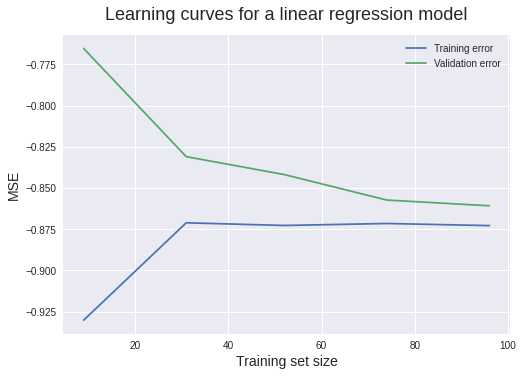

In [53]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()

In [ ]:
y_pred=regressor.predict(X_test)

In [56]:
mean_squuared_error=np.mean(np.square(np.subtract(y_pred,y_test)))
mean_squuared_error

55.46466860107889

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.7789618079255667

In [24]:
regressor.score(X_train,y_train)

0.8755822543891353

In [25]:
regressor.intercept_

13.969723618566576

In [26]:
regressor.coef_

array([ 3.91326867,  2.80219406, -0.11133754])